## Dataset consejos procesado


In [1]:
import pandas as pd

df_consejos = pd.read_csv('datos_consejos_preprocesados.csv')

In [2]:
df_consejos.head(10)

,negocio_id,num_likes,texto,usuario_id,anyo,mes,dia,hora,minuto
0,VaKXUpmWTTWDKbpJ3aQdMw,0,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag,2014,3,27,3,51
1,OPiPeoJiv92rENwbq76orA,0,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg,2013,5,25,6,0
2,5KheTjYPu1HcQzQFtm4_vw,0,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q,2011,12,26,1,46
3,TkoyGi8J7YFjA6SbaRzrxg,0,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA,2014,3,23,21,32
4,AkL6Ous6A1atZejfZXn1Bg,0,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ,2012,10,6,0,19
5,kj1p6NwUGROOoqNySf0I1Q,0,It's true! The drunken noodles are outrageous!,iAd8XaHxv05iXyEiZ62Ibw,2011,12,31,18,2
6,0hudPyuCBlKg79OwKBw-eQ,0,"Only worth a visit in the summer time, to take...",w8p4JW6-ERsbg8aB5wjEAg,2012,10,11,23,6
7,r49iBfbnfoK7yt4rdsL_7g,0,Hands down best AYCE in town! Love it!,CaFbX7topxdLpBJ_SNDfGQ,2016,1,5,6,39
8,YCRCFBr6myPS49on2aS2pQ,0,Sat in the drive thru this afternoon for 30 mi...,VLy6l8L72adD7iTBNqiPXw,2017,3,13,3,29
9,RTBIiq-fJUXRsrzbL4MCqw,0,Okay so I had a groupon for a nearby service c...,zrvk0-B91ahJRSB-UcAmIA,2013,2,8,20,55


### Descripción de atributos

   #### usuario_id: 
   String que contiene un conjunto de números y letras que identifican unívocamente a un usuario que realiza una reseña.
   #### negocio_id
   String que contiene un conjunto de números y letras que identifican unívocamente a un negocio que es elemento valorado en la     reseña.
   #### texto
   Texto que contiene la reseña de un usuario acerca de un negocio.
   #### num_likes
   Numero de likes recibidos por la reseña. valores de [0 a 15]
   #### anyo
   Año en el que se realizó la reseña valores de  [2009 a 2018]
   #### mes
   Mes en el que se realizó la reseña valores de [1 a 12]
   #### dia
   Día en el que se realizó la reseña valores de [0 a 31]
   #### hora
   Hora en la que se realizó la reseña valores de [0 a 23]
   #### minuto
   Minuto en el que se realizó la reseña, valores de [0 a 59]

## Análisis descriptivo

Inicialmente, lanzamos un describe para conocer cómo se distribuyen los datos y posibles incoherencias en los mismos, como número de likes negativos... etc.

In [3]:
# Lo ponemos de esta forma para quitar la notación científica
df_consejos.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))


,num_likes,anyo,mes,dia,hora,minuto
count,1.22309e+06,1.22309e+06,1.22309e+06,1.22309e+06,1.22309e+06,1.22309e+06
mean,0.0164738,2014.08,6.37506,15.7498,12.0047,29.5622
std,0.14564,2.29733,3.2916,8.80876,8.43059,17.3066
min,0,2009,1,1,0,0
25%,0,2012,4,8,3,15
50%,0,2014,6,16,15,30
75%,0,2016,9,23,20,45
max,15,2018,12,31,23,59


**num_likes:** La mayoria de comentarios sobre negocios no tienen likes como se puede observar. Hasta el 75% de los valores son de comentarios sin likes. Por lo que la media se acerca mucho a 0. El comentario con mayor puntuacion llega a 15 likes y se puede ver que no hay puntuaciones negativas.

**año:** La media esta bastante centrada y no tiene una desviacion tipica muy elevada por lo que la mayoria de los datos estaran relativamente cerca de la media. Observando los quartiles se puede ver que los primeros 25% de los datos se distribuyen en 3 años mientras que los siguientes 50% se distribuyen en 4 esto puede ser porque en los primeros años de recogida no habia suficientes comentarios.

**mes:** La media de los comentarios es de 6.37 esto puede significar que la mayoria de los datos se acumulan en este mes o si la desviacion es alta es posible que los comentarios se produzcan a lo largo de todos los meses. Observando los cuartiles se puede observar como el 25% de los comentarios se acumulan en los 4 primeros meses, mientras que los siguientes 2 meses se acumula otro 25% por lo tanto cuanto mas centrados los meses (que corresponden con el verano) mas comentarios se producen.

**dia:** Observando la media de los dias se puede ver bastante centrada aunque con una desviacion tipica elevada que indica que los valores no estan concentrados cerca del valor medio. Ademas observando los cuartiles se puede apreciar una distribucion bastante uniforme de los datos con lo cual no parece que el dia del mes en principio influya para dejar comentarios

**hora:** Observando la media y la desviacion tipica se puede apreciar que la distribucion de los comentarios por hora no se acumula en los valores medios. Ademas observando como el 25% de los primeros datos se acumulan en las 3 primeras horas y como los 25% ultimos datos se acumulan en las 3 ultimas. Se puede sospechar que dependiendo de las horas la afluencia de comentarios puede variar.

**minuto:** Observardo como la media de los minutos es 30 y como la desviacion tipica es bastante elevada se puede deducir que la distribucion de los comentarios no se acumula en la media. Ademas  se puede ver una distribucion uniforme ya que  los quartiles coinciden perfectamente con los cuartos de una hora (15,30,45 y 60 que en este caso seria 59). Por lo tanto no hay minutos mas significativos donde los usuarios traten de dejar mas comentarios.


## ANALISIS COMENTARIOS

Tras haber analizado mediente el describe las estidisticas basicas de los datos se van a graficar el numero de comentarios por año mes dia y minuto, para tratar 

## Numero de comentarios por año

In [4]:
gk=df_consejos.drop(['mes','dia','num_likes','minuto','negocio_id','usuario_id','hora'],axis=1)
gk.groupby('anyo').count().plot()

-Se puede ver un incremento de los registros de los comentarios en los primeros años hasta llegar a 2012 posiblente por el crecimiendo de la base de datos y los registros.

-Apartir de ese punto el  numero de comentarios decae lentamente.

-Con este grafico podemos observar la evolucion de los registros totales de la base aunque no nos proporcione mucha informacion.



## Numero de comentarios por mes

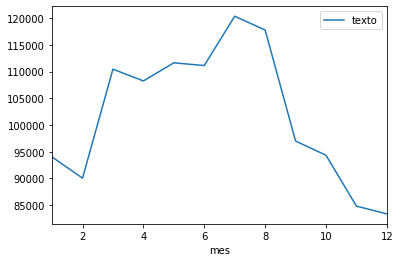

In [5]:
gk=df_consejos.drop(['dia','anyo','num_likes','minuto','negocio_id','usuario_id','hora'],axis=1)
gk.groupby('mes').count().plot()

-Los numero representan los nombres de los meses y estan ordenados de enero (1) a diciembre (12).

-Se puede observar como desde octubre a febrero el numero de comentarios es mas bajo de lo normal posiblemente porque en invierno la gente salga menos a distintos sitios y por lo tanto dejen menos comentarios.

-Se puede observar que desdee junio a agosto hay un pico significativo en los comentarios posiblemente porque en verano la gente tiene mas tiempo libre y hace mejor clima para salir a distintos sitios y dejar mas comentarios.

## Numero de comentarios por dia

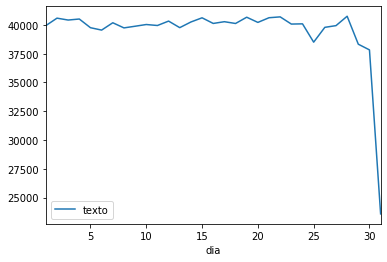

In [6]:
gk=df_consejos.drop(['mes','anyo','num_likes','minuto','negocio_id','usuario_id','hora'],axis=1)
gk.groupby('dia').count().plot()

-Se puede ver como los dias no influye en el numero de comentarios ya que no hay grandes variaciones.

-Al final los valores de los comentarios por dia decaen ya que no todos los meses tienen 31 dias.

## Numero de comentarios por hora

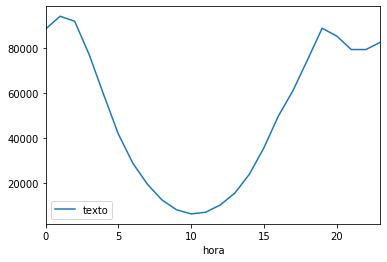

In [7]:
gk=df_consejos.drop(['mes','anyo','num_likes','minuto','negocio_id','usuario_id','dia'],axis=1)
gk.groupby('hora').count().plot()

-Se puede ver claramente como hay una tendencia clara a dejar opinionesentre las 7 y las 3. Esto se debe posiblemente a que son las horas donde las personas tienen tiempo libre para ir a distintos negocios y dejar sus valoraciones.

-Entre las 4 de la mañana y las 5 de la tarde no hay tantos comentarios debido a que son las horas de descanso y trabajo.

## Numero de comentarios por minuto

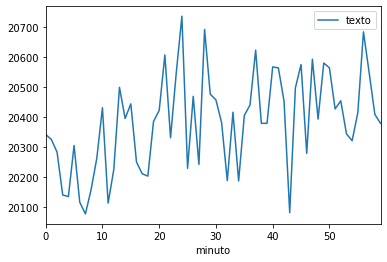

In [8]:
gk=df_consejos.drop(['mes','anyo','num_likes','hora','negocio_id','usuario_id','dia'],axis=1)
gk.groupby('minuto').count().plot()

-Se puede apreciar una funcion con muchos altibajos que no varia mucho ya que el maximo es 20700 y el minimo 20100 esto supone solo una diferencia de 600 para valores de 20000. Por lo tanto los minutos no son relevantes a la hora de analizar los comentarios lo cual tiene sentido ya que las personas no se fijan en una medida de tiempo tan pequeña para dejar comentarios.

## ANALISIS LIKES

El numero de likes que tienen los comentarios sigue distribuciones muy similares a las de los comentarios por lo tanto a no ser que haya excepciones las explicaciones son las mismas.

## Numero de likes por año

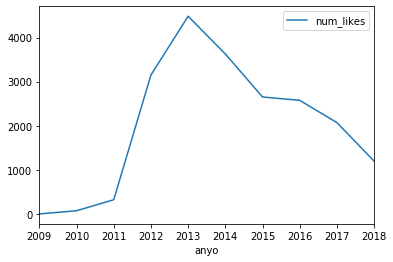

In [9]:
glikes=df_consejos.drop(['mes','dia','hora','minuto','texto','negocio_id','usuario_id'],axis=1)
glikes.groupby('anyo').sum().plot()


## Numero de likes por Mes

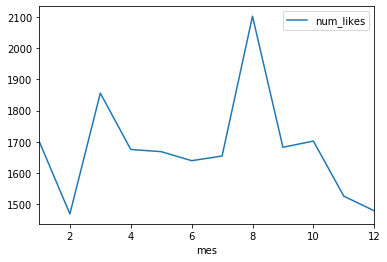

In [10]:
glikes=df_consejos.drop(['anyo','dia','hora','minuto','texto','negocio_id','usuario_id'],axis=1)
glikes.groupby('mes').sum().plot()

-A diferencia que con el numero de comentarios entre mayo y junio hay menos likes de comentarios en comparacion con el numero de comentarios por año

## Numero de likes por Dia

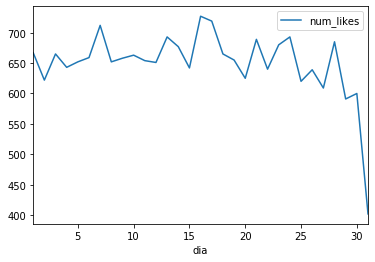

In [11]:
glikes=df_consejos.drop(['mes','anyo','hora','minuto','texto','negocio_id','usuario_id'],axis=1)
glikes.groupby('dia').sum().plot()

## Numero de likes por Hora

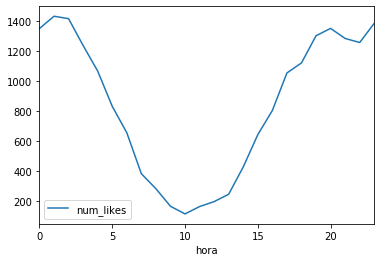

In [12]:
glikes=df_consejos.drop(['mes','anyo','dia','minuto','texto','negocio_id','usuario_id'],axis=1)
glikes.groupby('hora').sum().plot()

## Numero de likes por minuto

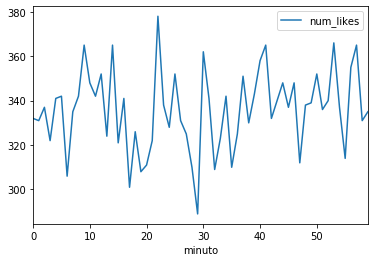

In [13]:
glikes=df_consejos.drop(['mes','anyo','dia','hora','texto','negocio_id','usuario_id'],axis=1)
glikes.groupby('minuto').sum().plot()

## Boxplot
Acontinuacion se pasara a analizar las estadisticas del numero de likes de los comentarios en funcion de los distintos meses. 

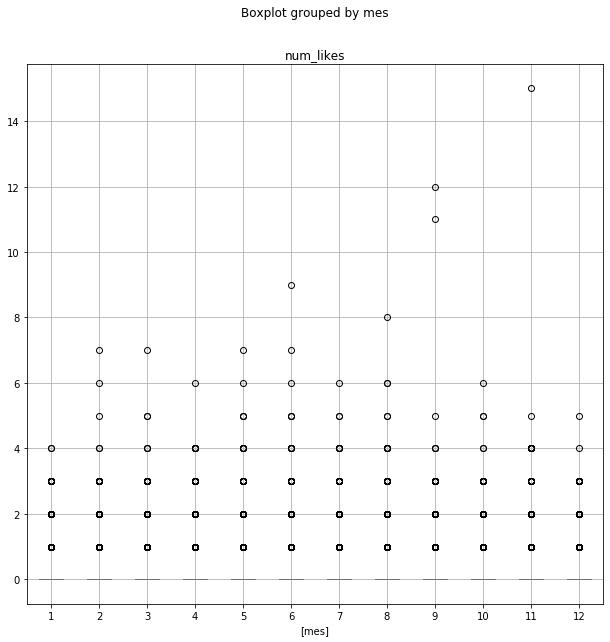

In [16]:
boxplot_consejos=df_consejos.drop(['texto','anyo','hora','negocio_id','usuario_id','dia','minuto'],axis=1)
boxplot_consejos.boxplot(by="mes", figsize=(10,10))


En el anterior boxplot que muestra la informacion de los likes que tienen los comentarios se puede ver que la mayoria de likes estan acumulados en 0 que es donde estan todos los boxplot. El resto de valores son puntos atipicos que se salen de la media y por lo tanto no se puede sacar informacion relevante de ellos.

Para poder tratar de analizar los demas comentarios la distribucion que siguen vamos a eliminar de la base todos los comentarios que tienen 0 likes

         num_likes          mes
count  1715.000000  1715.000000
mean      2.279883     6.449563
std       0.808955     3.439287
min       2.000000     1.000000
25%       2.000000     3.000000
50%       2.000000     7.000000
75%       2.000000     9.000000
max      15.000000    12.000000


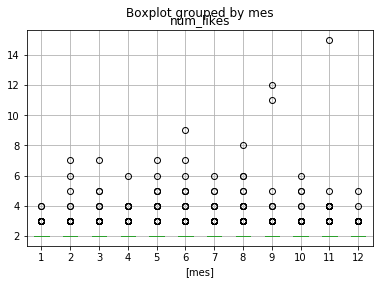

In [18]:
boxplot_consejos=df_consejos.drop(df_consejos[df_consejos.num_likes <= 1].index)

boxplot_consejos=boxplot_consejos.drop(['texto','anyo','hora','negocio_id','usuario_id','dia','minuto'],axis=1)
print(boxplot_consejos.describe())
boxplot_consejos.boxplot(by='mes')

Se puede ver como el problema persiste con comentarios superiores a 0 likes por lo que se tratara de filtrar los comentarios por un numero de likes mas elevado

       num_likes        mes
count   86.00000  86.000000
mean     4.94186   6.779070
std      1.83017   2.928164
min      4.00000   1.000000
25%      4.00000   5.000000
50%      4.00000   7.000000
75%      5.00000   9.000000
max     15.00000  12.000000


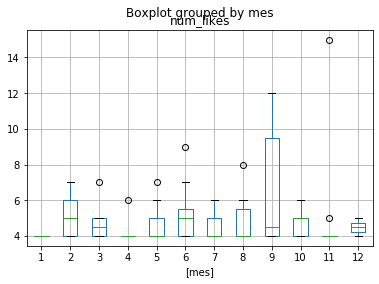

In [23]:
boxplot_consejos=df_consejos.drop(df_consejos[df_consejos.num_likes <= 3].index)

boxplot_consejos=boxplot_consejos.drop(['texto','anyo','hora','negocio_id','usuario_id','dia','minuto'],axis=1)
print(boxplot_consejos.describe())
boxplot_consejos.boxplot(by='mes')

-El numero de comentarios que tienen 3 o mas likes es solamente de 86 en comparacion con los 1.2 millones de comentarios por lo que no supone un gran numero.


*Posible ampliacion sacando 100 negocios y su evolucion por año*

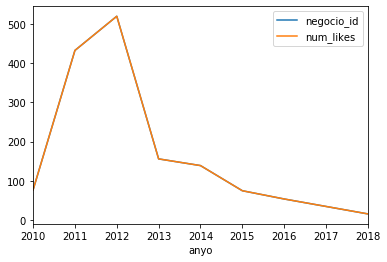

In [24]:
gk=df_consejos.drop(['texto','mes','hora','minuto','usuario_id','dia'],axis=1)
gk[gk.negocio_id=='DkYS3arLOhA8si5uUEmHOw'].groupby(['anyo']).count().plot()